<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotly" data-toc-modified-id="Plotly-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotly</a></span></li><li><span><a href="#plot-method" data-toc-modified-id="plot-method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>plot method</a></span></li><li><span><a href="#Plotly-Express" data-toc-modified-id="Plotly-Express-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotly Express</a></span><ul class="toc-item"><li><span><a href="#Multiple-line-series-with-same-scaling" data-toc-modified-id="Multiple-line-series-with-same-scaling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Multiple line series with same scaling</a></span></li><li><span><a href="#Multiple-line-series-with-different-scaling" data-toc-modified-id="Multiple-line-series-with-different-scaling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multiple line series with different scaling</a></span></li></ul></li><li><span><a href="#Labels" data-toc-modified-id="Labels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Labels</a></span></li><li><span><a href="#Colors" data-toc-modified-id="Colors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Colors</a></span><ul class="toc-item"><li><span><a href="#Multiple-Series" data-toc-modified-id="Multiple-Series-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Multiple Series</a></span></li><li><span><a href="#Single-series-with-multiple-colors" data-toc-modified-id="Single-series-with-multiple-colors-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Single series with multiple colors</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Seasonality</a></span><ul class="toc-item"><li><span><a href="#Hourly" data-toc-modified-id="Hourly-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Hourly</a></span></li><li><span><a href="#Day-of-week" data-toc-modified-id="Day-of-week-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Day of week</a></span></li></ul></li><li><span><a href="#Yearly" data-toc-modified-id="Yearly-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Yearly</a></span></li></ul></li><li><span><a href="#Histogram" data-toc-modified-id="Histogram-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Histogram</a></span><ul class="toc-item"><li><span><a href="#Discrete-bins" data-toc-modified-id="Discrete-bins-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Discrete bins</a></span></li><li><span><a href="#Stacked-bars" data-toc-modified-id="Stacked-bars-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Stacked bars</a></span></li><li><span><a href="#Marginals" data-toc-modified-id="Marginals-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Marginals</a></span></li><li><span><a href="#Trendline" data-toc-modified-id="Trendline-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Trendline</a></span></li><li><span><a href="#Cumulative" data-toc-modified-id="Cumulative-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Cumulative</a></span></li><li><span><a href="#Multiple-histograms-in-y-axis" data-toc-modified-id="Multiple-histograms-in-y-axis-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Multiple histograms in y axis</a></span></li><li><span><a href="#KDE" data-toc-modified-id="KDE-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>KDE</a></span><ul class="toc-item"><li><span><a href="#Grouped" data-toc-modified-id="Grouped-6.7.1"><span class="toc-item-num">6.7.1&nbsp;&nbsp;</span>Grouped</a></span></li><li><span><a href="#Separated" data-toc-modified-id="Separated-6.7.2"><span class="toc-item-num">6.7.2&nbsp;&nbsp;</span>Separated</a></span></li></ul></li></ul></li><li><span><a href="#Discrete-Heatmap" data-toc-modified-id="Discrete-Heatmap-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Discrete Heatmap</a></span></li></ul></div>

# Plotly

We explore plotly capabilites, its main features, workarounds and limitations

In [1]:
# ignore warnings to look nice ;)
import warnings

warnings.simplefilter("ignore")

In [2]:
# data manipulation
import pandas as pd

# low level plotly objects
import plotly.graph_objects as go

# wrapper around high level methods
import plotly.express as px

# templates
import plotly.io as pio

# used mostly for secondary axis
from plotly.subplots import make_subplots

# days of week definitions
import calendar

# use colormap convinience functions
import seaborn as sns
import matplotlib.colors as color

# pandas >= 0.25, plotly >= 4.8
# df.plot methods access plotly instead of matplotlib
pd.options.plotting.backend = "plotly"

# dark theme has a better contrast than plotly_light, the default theme
pio.templates.default = "plotly_dark"

# Github wont display HTML Figures
pio.renderers.default = "png"

In [3]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/WillKoehrsen/Data-Analysis/master/plotly/building_one.csv",
    header=[0, 1],
    index_col=0,
    parse_dates=True,
)

In [4]:
data.head()

type                StaticPressure                 Energy      Steam  \
sensor                           1         2            3          4   
measured_at                                                            
2017-12-14 11:00:00       0.806723  1.500570  6035.214040  13.164377   
2017-12-14 11:15:00       0.789395  1.490740  6182.405506  13.003065   
2017-12-14 11:30:00       0.792908  1.473761  6035.187942  12.617836   
2017-12-14 11:45:00       0.790165  1.485213  6035.192571  12.419816   
2017-12-14 12:00:00       0.786861  1.482015  6035.198581  12.975920   

type                            
sensor                       5  
measured_at                     
2017-12-14 11:00:00  10.367290  
2017-12-14 11:15:00   9.801097  
2017-12-14 11:30:00   9.794436  
2017-12-14 11:45:00   9.597848  
2017-12-14 12:00:00  10.041990

Lets not use multiindex. It doesnt actually bring anything to the table, and doesnt bode well with plotly at all.

In [5]:
data.columns = ["_".join(x).lower() for x in data.columns.values.tolist()]

In [6]:
data.head()

,staticpressure_1,staticpressure_2,energy_3,steam_4,steam_5
measured_at,,,,,
2017-12-14 11:00:00,0.806723,1.500570,6035.214040,13.164377,10.367290
2017-12-14 11:15:00,0.789395,1.490740,6182.405506,13.003065,9.801097
2017-12-14 11:30:00,0.792908,1.473761,6035.187942,12.617836,9.794436
2017-12-14 11:45:00,0.790165,1.485213,6035.192571,12.419816,9.597848
2017-12-14 12:00:00,0.786861,1.482015,6035.198581,12.975920,10.041990


# plot method
You can use plotly as backend to [pandas plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) calls. 

The call is flat: `df.column.plot()` instead of nested `plot(df.column)`. 

The `plot` method, however, uses (\*args, \*\*kwargs), so there will be no autocomplete for arguments.

Right off the bat we gain:
- autoscaling: the image will fit the width.
- interactivity: you can hover the points to see their data
- cropping: you can select a box to exclude the rest. You can double click to reset the zoom
- legend filtering: you can filter clicking the legend name, which will be useful when you have more than one

And also the functions avaiable for plotly figures, which appear on the top right when you hover them, the most convinient being: to save the figure function and the compare date on hover function

The [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) will also be used, which causes:
- the legend is used by default, and the legent title is `variable`
- the y axis title is `value`



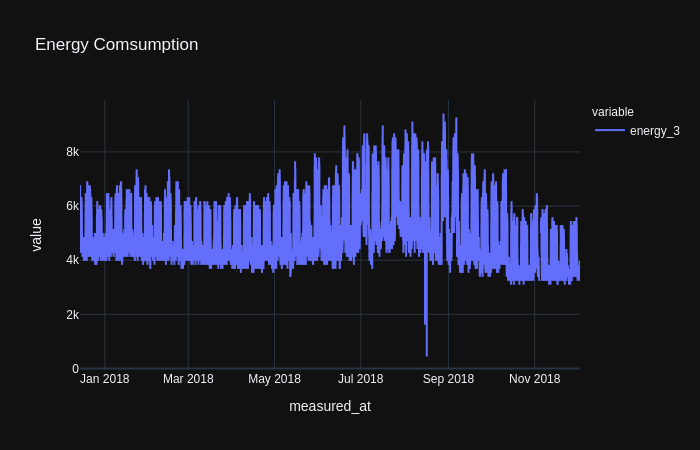

In [7]:
data.energy_3.plot(title="Energy Comsumption")

You can address the issue with generic labels using the [labels](https://plotly.com/python-api-reference/generated/plotly.express.line.html#plotly.express.line) argument, by taking into consideration that we know the column values to be used

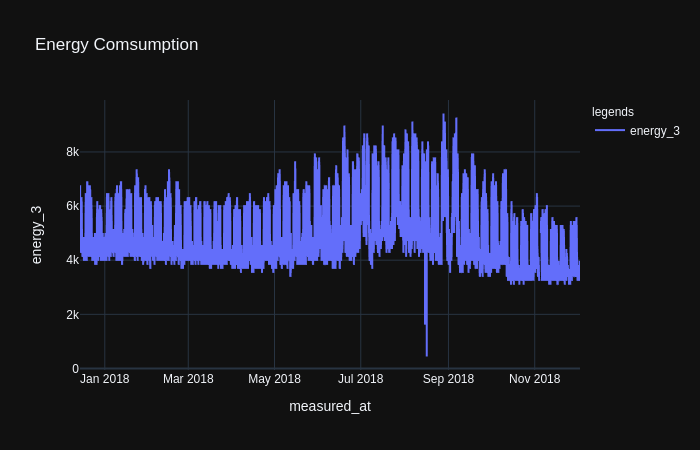

In [8]:
data.energy_3.plot(
    title="Energy Comsumption", labels={"value": "energy_3", "variable": "legends"}
)

We can also get rid of the legend altogether

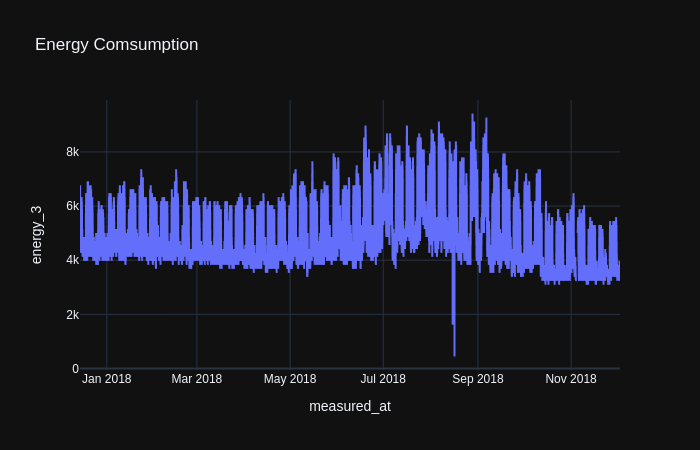

In [9]:
data.energy_3.plot(
    title="Energy Comsumption", labels={"value": "energy_3", "variable": "legends"}
).update_layout(showlegend=False)

# Plotly Express
None of this will be actually an issue if we stick to `plotly.express`.

By default, the `x` axis is the data frame index.

We also regain the autocomplete for all arguments inside the method we are using. 


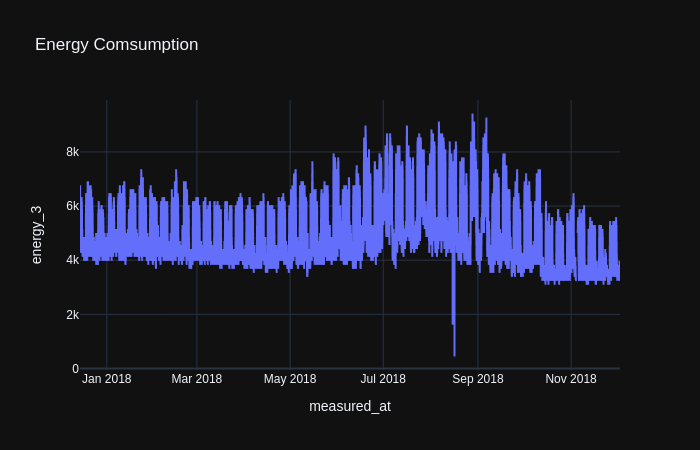

In [10]:
px.line(data, y="energy_3", title="Energy Comsumption")

Express will still use legends if they are necessary.

Notice the labels: it is just using `pd.melt` under the hood

## Multiple line series with same scaling

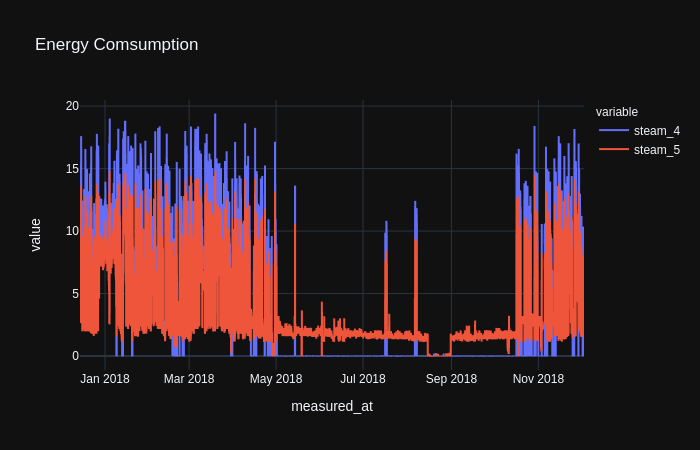

In [11]:
px.line(data, y=["steam_4", "steam_5"], title="Energy Comsumption")

## Multiple line series with different scaling

Unfortunately, theres no elegant solution for secondary, indepedent, y axis, if the variables dont have the same scaling

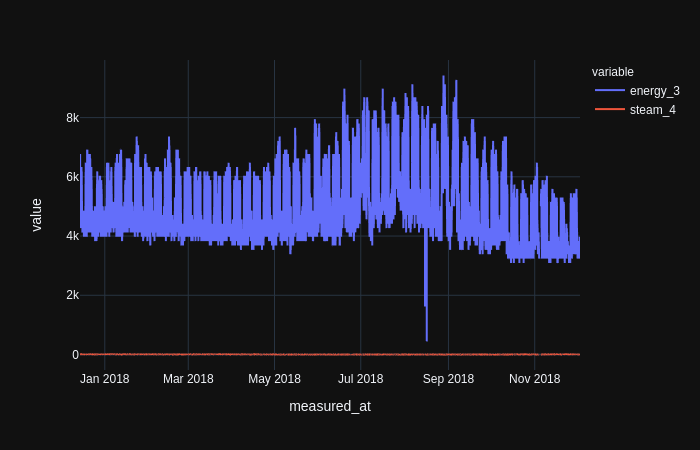

In [12]:
px.line(data, y=["energy_3", "steam_4"])

We can still create plotly objects directly, and use the `secondary_y` property with [make_subplots](https://plotly.com/python/subplots/).

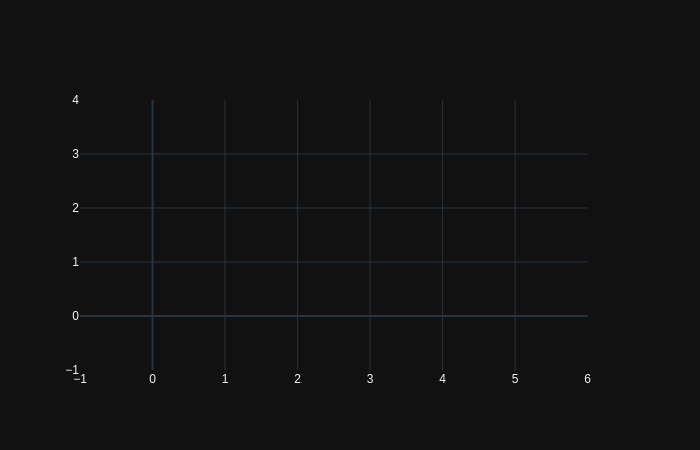

In [13]:
subplot_figure = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])
subplot_figure

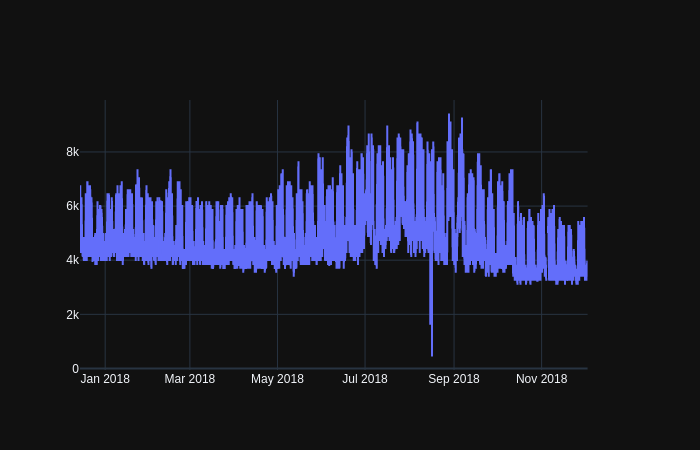

In [14]:
subplot_figure = subplot_figure.add_trace(
    go.Scatter(x=data.index, y=data.energy_3, name="energy_3"), secondary_y=False
)
subplot_figure


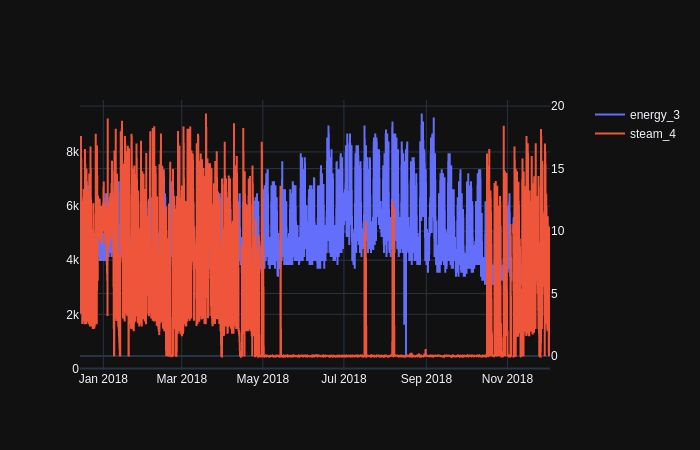

In [15]:
subplot_figure = subplot_figure.add_trace(
    go.Scatter(x=data.index, y=data.steam_4, name="steam_4"), secondary_y=True
)
subplot_figure

# Labels

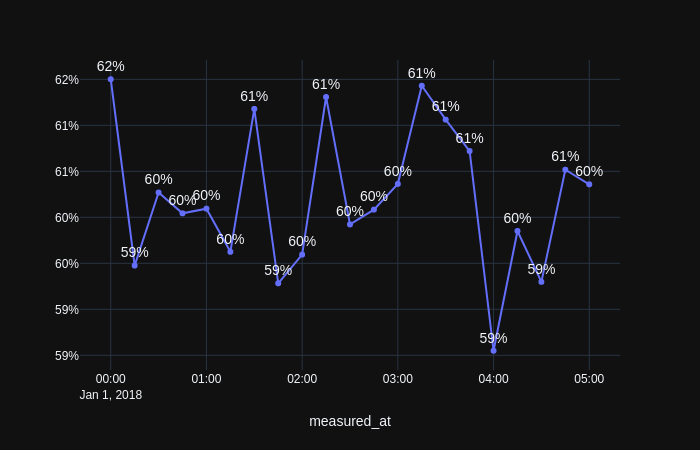

In [16]:
px.line(
    data.loc["2018-01-01 00:00:00":"2018-01-01 05:00:00"].reset_index(),
    x="measured_at",
    y="staticpressure_1",
    text="staticpressure_1",
).update_traces(
    texttemplate="%{text:.0%}",
    textposition="top center",
    textfont=go.scatter.Textfont(size=14),
).update_layout(
    yaxis=go.layout.YAxis(tickformat="%")
)

In [17]:
def _get_daily_max(day_df: pd.DataFrame) -> pd.DataFrame:
    max_values = day_df.steam_4.max()
    max_index = day_df.iloc[day_df.steam_4.argmax()].measured_at
    return pd.DataFrame(
        [[max_values, max_index]], columns=["max_value", "max_value_timestamp"]
    )


data["annotation"] = (
    (data.reset_index().groupby(data.index.round("D")).apply(_get_daily_max))
    .set_index("max_value_timestamp", drop=False)
    .apply(
        lambda df: f"{df.max_value_timestamp.strftime('%a')} <br> {df.max_value_timestamp.strftime('%I:%M %p')} <br>{df.max_value:.1f} Mlbs/hr",
        axis=1,
    )
)

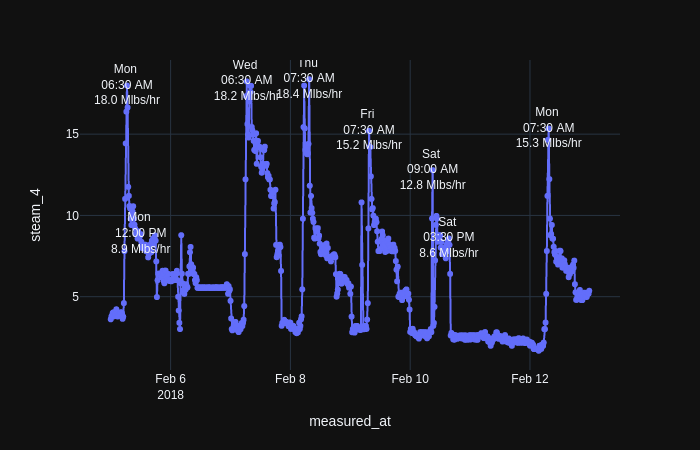

In [18]:
px.line(
    data.loc["2018-02-05":"2018-02-12"], y="steam_4", text="annotation"
)

# Colors

## Multiple Series
In the long format, one column contains the values, and another contains the group these values belong to.

This way, we want to have as many line charts as groups

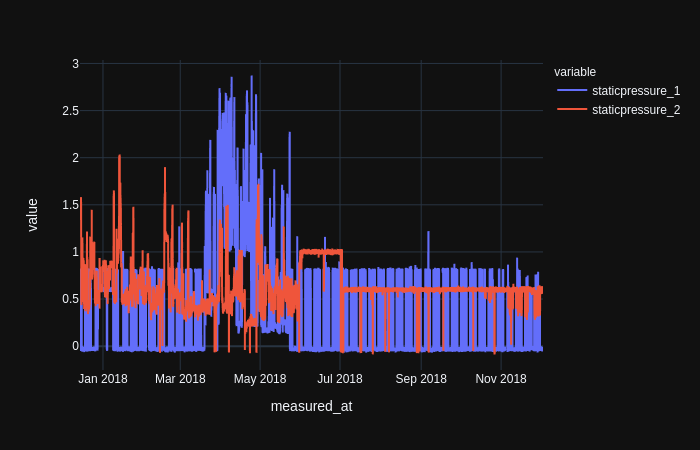

In [19]:
long_format = data.reset_index().melt(
    id_vars="measured_at", value_vars=["staticpressure_1", "staticpressure_2"]
)
px.line(
    long_format, x="measured_at", y="value", color="variable",
)

## Single series with multiple colors
This is specially cumbersome

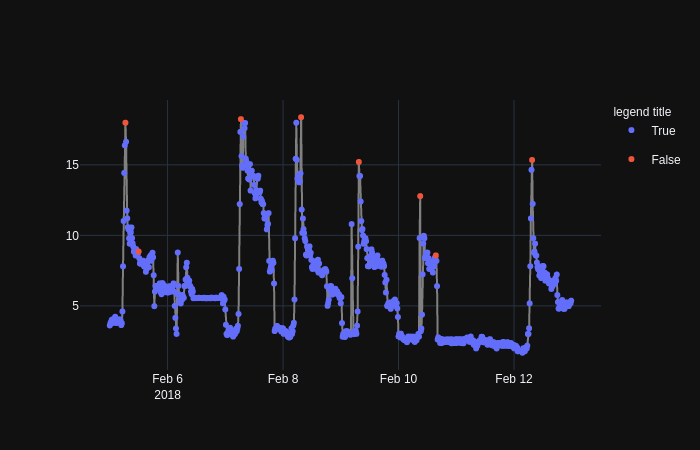

In [20]:
df = data.loc["2018-02-05":"2018-02-12"]
(
    go.Figure(go.Scatter(x=df.index, y=df.steam_4, marker=dict(color="grey"), name=""))
    .add_traces(px.scatter(df, y="steam_4", color=df.annotation.isnull()).data)
    .update_traces({"showlegend": False}, {"name": ""})
    .update_layout(legend_title_text="legend title")
)

## Seasonality 

### Hourly

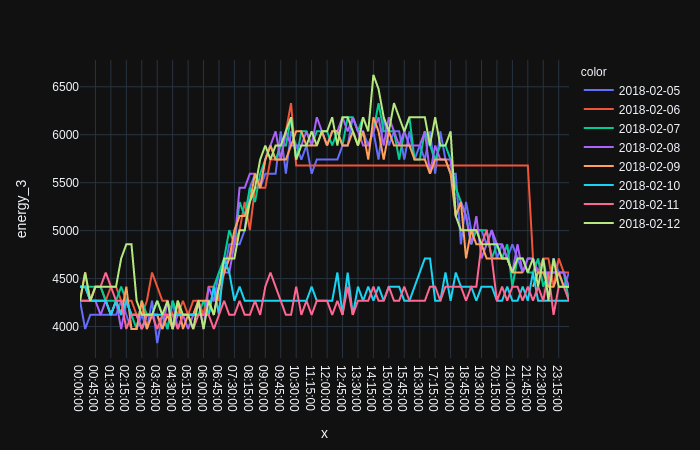

In [21]:
px.line(
    df.reset_index(), x=df.index.time, y="energy_3", color=df.index.date.astype(str)
)

In [22]:
df = data['2018-07-01':].resample("D").energy_3.mean()

### Day of week

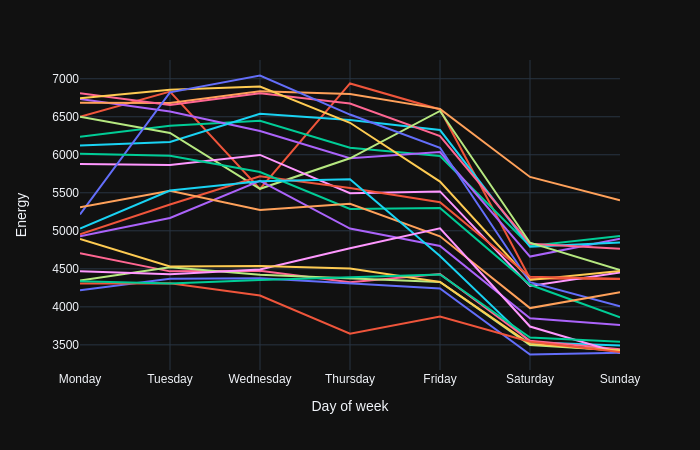

In [23]:
f = px.line(
    df,
    x=df.index.day_name(),
    y=df,
    color=df.index.week,
    category_orders={"x": list(calendar.day_name)},
    labels={"x": "Day of week", "y": "Energy"},
).update_layout(showlegend=False)
f

It is very cumbersome to add a continuous scale to the line groups, though

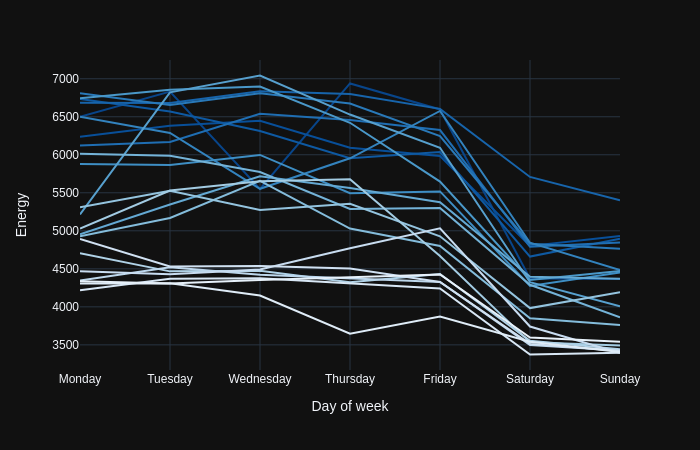

In [24]:
for index, color_tuple in enumerate(
    reversed(sns.color_palette("Blues", df.index.week.nunique()))
):
    f.data[index]["line"]["color"] = color.to_hex(color_tuple)

f

## Yearly

In [25]:
temperatures = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv",
    parse_dates=["Date"],
)

In [26]:
temperatures

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


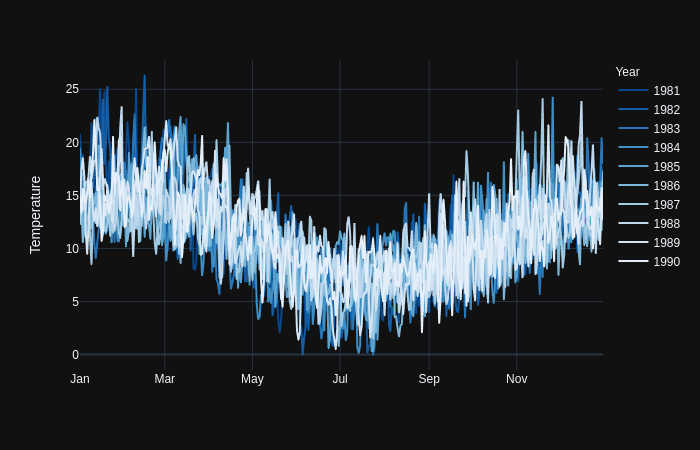

In [27]:
f = px.line(
    temperatures,
    x=temperatures.Date.dt.strftime("1990-%m-%d"),
    y="Temp",
    color=temperatures.Date.dt.year,
    labels={"x": "Month", "Temp": "Temperature", "color": "Year"},
).update_layout(xaxis=go.layout.XAxis(tickformat="%b"))
for index, color_tuple in enumerate(
    reversed(sns.color_palette("Blues", temperatures.Date.dt.year.nunique()))
):
    f.data[index]["line"]["color"] = color.to_hex(color_tuple)

f

# Histogram
## Discrete bins

Similar results can be achieved using `data.energy_3.hist()`

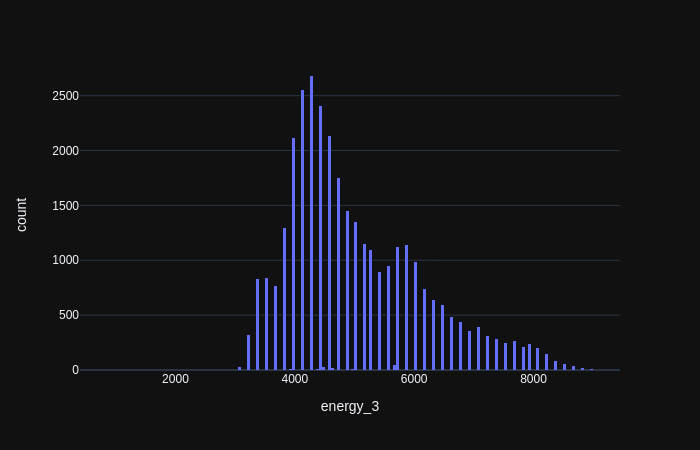

In [28]:
px.histogram(data, x="energy_3")

## Stacked bars

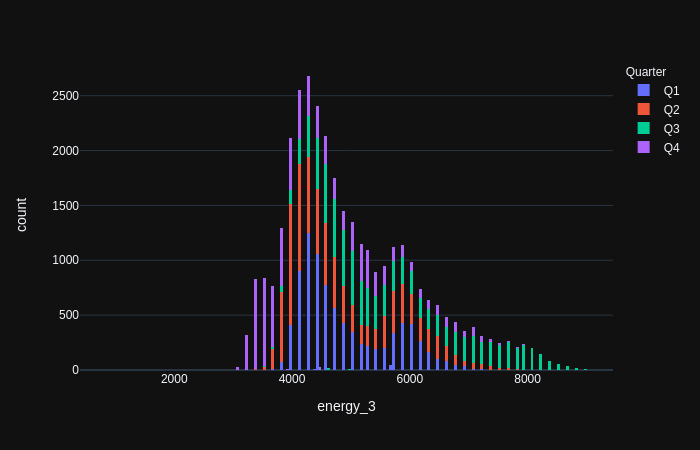

In [29]:
px.histogram(
    data,
    x="energy_3",
    color="Q" + data.index.quarter.astype("str").sort_values(),
    labels={"color": "Quarter"},
)

## Marginals

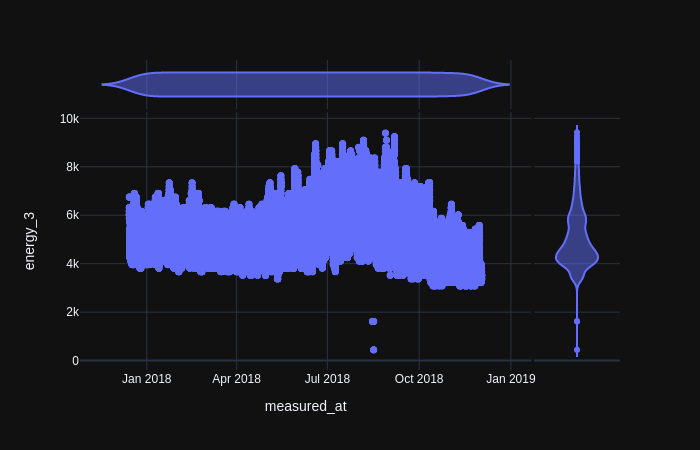

In [30]:
px.scatter(data, y="energy_3", marginal_y="violin", marginal_x="violin")

## Trendline

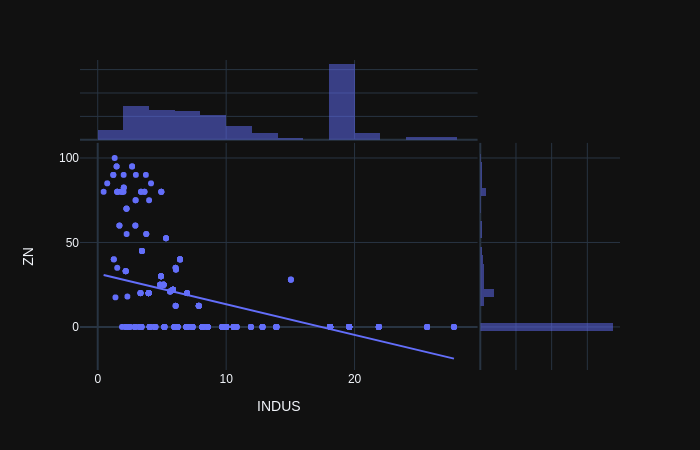

In [31]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

px.scatter(
    boston,
    x="INDUS",
    y="ZN",
    marginal_y="histogram",
    marginal_x="histogram",
    trendline="ols",
)

## Cumulative

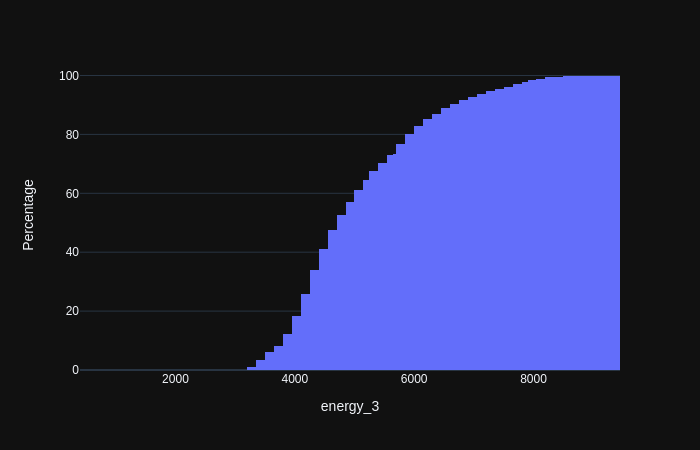

In [32]:
px.histogram(
    data,
    x="energy_3",
    histnorm="percent",
    cumulative=True,
    #    labels={"count": "percentage"}, this doesnt work
).update_layout(yaxis=go.layout.YAxis(title="Percentage"))

## Multiple histograms in y axis

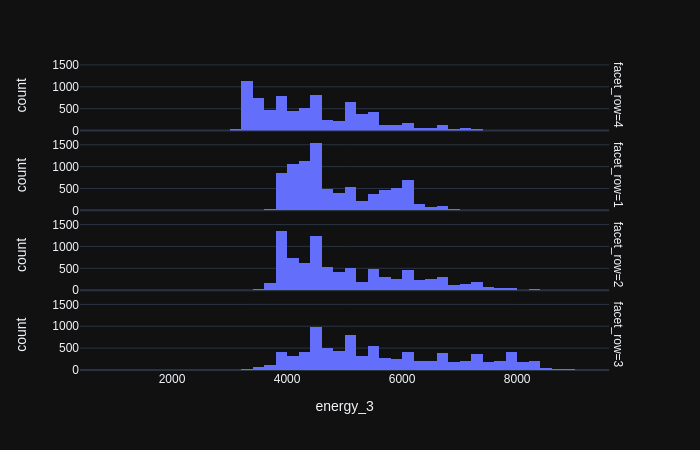

In [33]:
px.histogram(data, x="energy_3", facet_row=data.index.quarter, nbins=50)

## KDE
aka violin

### Grouped

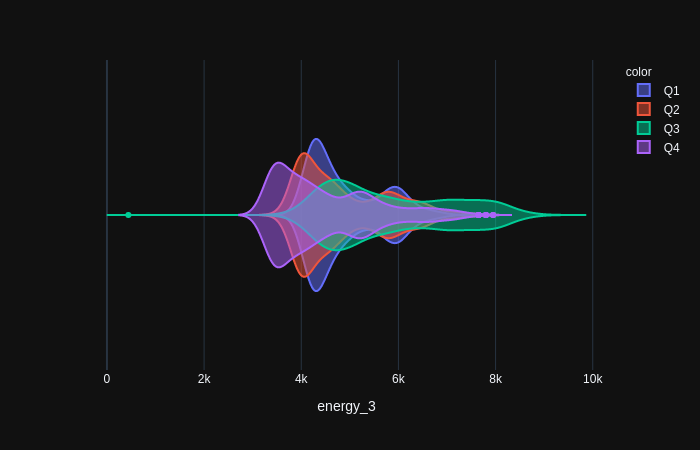

In [34]:
px.violin(
    data,
    x="energy_3",
    color="Q" + data.index.quarter.sort_values().astype(str),
    violinmode="overlay",
)

### Separated

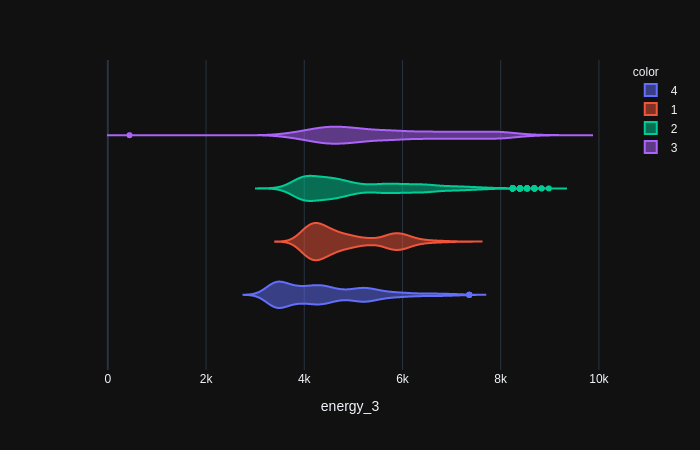

In [35]:
px.violin(data, x="energy_3", color=data.index.quarter, height=800)

# Discrete Heatmap

In [36]:
corr = boston.corr().reset_index().melt(id_vars="index")

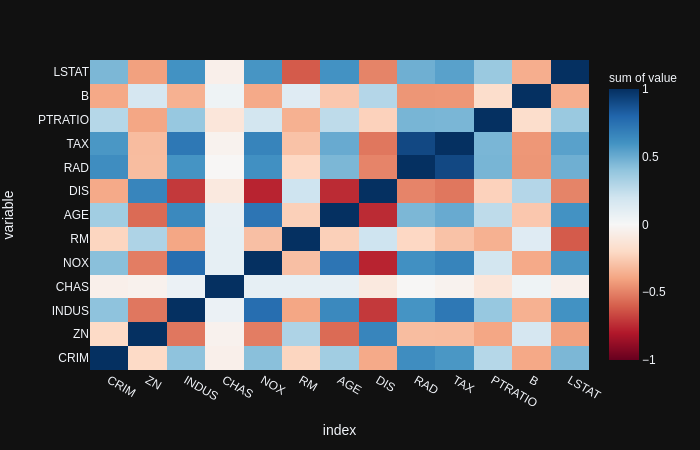

In [37]:
px.density_heatmap(
    corr,
    x="index",
    y="variable",
    z="value",
    color_continuous_scale="RdBu",
    color_continuous_midpoint=0,
)

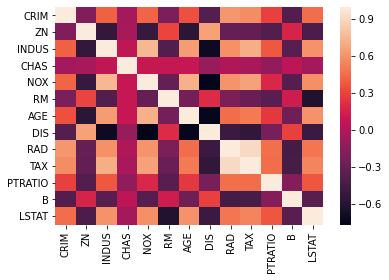

In [38]:
sns.heatmap(boston.corr())